# domains and frequency
This notebook looks at the data from the "domain_requests.csv" that is a version of the Little Forest domain list (`LF_Survey.csv`) that has had some features engineered, such as an "asses" column of the possible relevance of the domain ("KEEP", "CHECK", "REMOVE"), the redirect code or zero if this is null, status message, or a break down of each subdomain in the URL.

In [1]:
from ast import literal_eval
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Notebook Functions

In [2]:
# search the domains in 'data' for a string match.

def find_from_sd(sd):
    '''
    This function takes a string and searches the 'data' dataframe's domains listed in the dataframe for a match. 
    Note: the function searches in the "bottom_dom_trunc" column, which must first be added to the dataframe.
    
    sd = string to look for a match in the subdomain columns.
    '''
    df = pd.DataFrame([],columns = data.columns)
    check = ['subdomain1','subdomain2','subdomain3','subdomain4','subdomain5','subdomain6','bottom_dom_trunc']
    for i in check:
        test = data[data[i] == sd].shape[0]
        if test != 0:
            df = df.append(data[data[i] == sd], ignore_index=True)
            
    return df

In [3]:
def search(term,df,col=["all"]):
    '''
    Search selected columns for a phrase in a string (e.g. subdomain)
    term = string to find
    df = dataframe to search
    col = array of the column(s) to search in (column must contain strings)
    The search itterates through all the columns one row at a time looking for a match and returns a new dataframe with all the matched rows
    '''
    temp_df = pd.DataFrame([],columns = df.columns)
    if col[0]=="all":
        check = df.columns
    else:
        check = col
        
    r = df.shape[0]
    for c in check:
        try:
            for i in range(0,r):
                str_index = df.loc[i,c].find(term)
                if str_index != -1:
                    temp_df = temp_df.append(df.loc[i], ignore_index=True)
        except AttributeError as Error:
            print(f'Skipped Column: {c} column does not contain string objects and cannot be searched. {Error}')
        
            
    return temp_df

In [4]:
# To be used in setting up the dataframe. 
# This will add a new feature that splits the bottom domain at the first hyphen ("-")
# or if there is no hyphen it will take the first 5 letters of the domain.

def bottom_dom_truncate(dom):
    '''
    this function will split a string at the first hyphen ("-") and return the truncated string
    or if there is no hyphen it will take the first 5 letters and return that value. 
    
    dom = string to truncate.
    '''
    if "-" in dom:
        ls = dom.split("-")
        dom_trunc = ls[0] + "-"
    else:
        dom_trunc = dom[:5]
    return dom_trunc

In [5]:
# function counts the occurences of a sub domain in a specific category *i.e. REMOVE, KEEP, CHECK

def count_occ(cat , dom):
    '''
    Counts the occurences of a subdomain in a specific category in the "assess" column of the "data" dataframe.
    
    cat = value to filter the assess column on (i.e. "CHECK", "KEEP", "REMOVE").
    dom = string that is the domain to count.
    '''
    count = 0
    filter_df = data[data["assess"] == cat]
    check = ['subdomain1','subdomain2','subdomain3','subdomain4','subdomain5','subdomain6',"bottom_dom_trunc"]
    for c in check:
        find = filter_df[filter_df[c] == dom][c].count()
        count = count + find
    return count
    

In [6]:
def show_rows(x="off",length=None):
    '''
    quickly toggle row display on or off (I never can remember the pandas method and arguments.)
    default is to turn max rows off. 
    set pass "on" to expand the row setting, add a number to limit to set max # of columns.
    x = string. Use "on" to set dataframe row nmbers. default to off. All other values reset the row option.
    length = integer. Sets the number of rows to display. default is None.
    '''
    if x == "on":
        pd.set_option("display.max_rows", length)
    else:
        pd.reset_option("display.max_rows")

## Read in the data

In [8]:
data = pd.read_csv('data/domain_requests.csv', index_col=0)

In [9]:
data.columns

Index(['name', 'http status code', 'title', 'url', 'domain', 'predomain',
       'subdomain1', 'subdomain2', 'subdomain3', 'subdomain4', 'subdomain5',
       'subdomain6', 'res_status', 'status_message', 'redirect',
       'redirect_code', 'public', 'login', 'harvard_key', 'resolved_url',
       'success', 'assess', 'note'],
      dtype='object')

In [10]:
data.reset_index(drop=True)

,name,http status code,title,url,domain,predomain,subdomain1,subdomain2,subdomain3,subdomain4,...,status_message,redirect,redirect_code,public,login,harvard_key,resolved_url,success,assess,note
0,abcs.mgh.harvard.edu,200.0,ABCs - MICCAI 2020 Challenge,"['abcs', 'mgh', 'harvard', 'edu']",harvard.edu,abcs.mgh,mgh,abcs,NaN,NaN,...,HTTPS_REDIRECT,1,301,1,0,0,https://abcs.mgh.harvard.edu/,1,KEEP,HTTP Check: requested http://abcs.mgh.harvard....
1,abel.harvard.edu,200.0,Harvard Mathematics Department : Home page,"['abel', 'harvard', 'edu']",harvard.edu,abel,abel,NaN,NaN,NaN,...,VALID,0,0,1,0,0,http://abel.harvard.edu/,1,KEEP,VALID: http://abel.harvard.edu: 200
2,about.my.harvard.edu,200.0,Service Portal - IT Help,"['about', 'my', 'harvard', 'edu']",harvard.edu,about.my,my,about,NaN,NaN,...,URL_REDIRECT,1,301,1,0,0,https://harvard.service-now.com/ithelp,0,CHECK,CHECK: requested http://about.my.harvard.edu a...
3,ac-web.dce.harvard.edu,200.0,AC-WEB: Academic Computing,"['ac-web', 'dce', 'harvard', 'edu']",harvard.edu,ac-web.dce,dce,ac-web,NaN,NaN,...,HTTPS_REDIRECT,1,302,1,0,0,https://ac-web.dce.harvard.edu/,1,KEEP,HTTP Check: requested http://ac-web.dce.harvar...
4,academicresourcecenter.harvard.edu,200.0,Academic Resource Center,"['academicresourcecenter', 'harvard', 'edu']",harvard.edu,academicresourcecenter,academicresourcecenter,NaN,NaN,NaN,...,HTTPS_REDIRECT,1,301,1,0,0,https://academicresourcecenter.harvard.edu/,1,KEEP,HTTP Check: requested http://academicresourcec...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17493,zoom.cfa.harvard.edu,NaN,NaN,"['zoom', 'cfa', 'harvard', 'edu']",harvard.edu,zoom.cfa,cfa,zoom,NaN,NaN,...,empty,0,0,0,0,0,-1,-1,REMOVE,ERROR: http://zoom.cfa.harvard.edu : HTTPConne...
17494,zop-v.cfa.harvard.edu,NaN,NaN,"['zop-v', 'cfa', 'harvard', 'edu']",harvard.edu,zop-v.cfa,cfa,zop-v,NaN,NaN,...,empty,0,0,0,0,0,-1,-1,REMOVE,ERROR: http://zop-v.cfa.harvard.edu : HTTPConn...
17495,zztestbuildingsw1.fas.harvard.edu,NaN,NaN,"['zztestbuildingsw1', 'fas', 'harvard', 'edu']",harvard.edu,zztestbuildingsw1.fas,fas,zztestbuildingsw1,NaN,NaN,...,empty,0,0,0,0,0,-1,-1,REMOVE,ERROR: http://zztestbuildingsw1.fas.harvard.ed...
17496,zzz36.mgh.harvard.edu,NaN,NaN,"['zzz36', 'mgh', 'harvard', 'edu']",harvard.edu,zzz36.mgh,mgh,zzz36,NaN,NaN,...,empty,0,0,0,0,0,-1,-1,REMOVE,ERROR: http://zzz36.mgh.harvard.edu : HTTPConn...


In [11]:
# return "url" column values to list items.
data["url"] = data["url"].apply(lambda x: literal_eval(x))

In [12]:
data

,name,http status code,title,url,domain,predomain,subdomain1,subdomain2,subdomain3,subdomain4,...,status_message,redirect,redirect_code,public,login,harvard_key,resolved_url,success,assess,note
0,abcs.mgh.harvard.edu,200.0,ABCs - MICCAI 2020 Challenge,"[abcs, mgh, harvard, edu]",harvard.edu,abcs.mgh,mgh,abcs,NaN,NaN,...,HTTPS_REDIRECT,1,301,1,0,0,https://abcs.mgh.harvard.edu/,1,KEEP,HTTP Check: requested http://abcs.mgh.harvard....
1,abel.harvard.edu,200.0,Harvard Mathematics Department : Home page,"[abel, harvard, edu]",harvard.edu,abel,abel,NaN,NaN,NaN,...,VALID,0,0,1,0,0,http://abel.harvard.edu/,1,KEEP,VALID: http://abel.harvard.edu: 200
2,about.my.harvard.edu,200.0,Service Portal - IT Help,"[about, my, harvard, edu]",harvard.edu,about.my,my,about,NaN,NaN,...,URL_REDIRECT,1,301,1,0,0,https://harvard.service-now.com/ithelp,0,CHECK,CHECK: requested http://about.my.harvard.edu a...
3,ac-web.dce.harvard.edu,200.0,AC-WEB: Academic Computing,"[ac-web, dce, harvard, edu]",harvard.edu,ac-web.dce,dce,ac-web,NaN,NaN,...,HTTPS_REDIRECT,1,302,1,0,0,https://ac-web.dce.harvard.edu/,1,KEEP,HTTP Check: requested http://ac-web.dce.harvar...
4,academicresourcecenter.harvard.edu,200.0,Academic Resource Center,"[academicresourcecenter, harvard, edu]",harvard.edu,academicresourcecenter,academicresourcecenter,NaN,NaN,NaN,...,HTTPS_REDIRECT,1,301,1,0,0,https://academicresourcecenter.harvard.edu/,1,KEEP,HTTP Check: requested http://academicresourcec...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17493,zoom.cfa.harvard.edu,NaN,NaN,"[zoom, cfa, harvard, edu]",harvard.edu,zoom.cfa,cfa,zoom,NaN,NaN,...,empty,0,0,0,0,0,-1,-1,REMOVE,ERROR: http://zoom.cfa.harvard.edu : HTTPConne...
17494,zop-v.cfa.harvard.edu,NaN,NaN,"[zop-v, cfa, harvard, edu]",harvard.edu,zop-v.cfa,cfa,zop-v,NaN,NaN,...,empty,0,0,0,0,0,-1,-1,REMOVE,ERROR: http://zop-v.cfa.harvard.edu : HTTPConn...
17495,zztestbuildingsw1.fas.harvard.edu,NaN,NaN,"[zztestbuildingsw1, fas, harvard, edu]",harvard.edu,zztestbuildingsw1.fas,fas,zztestbuildingsw1,NaN,NaN,...,empty,0,0,0,0,0,-1,-1,REMOVE,ERROR: http://zztestbuildingsw1.fas.harvard.ed...
17496,zzz36.mgh.harvard.edu,NaN,NaN,"[zzz36, mgh, harvard, edu]",harvard.edu,zzz36.mgh,mgh,zzz36,NaN,NaN,...,empty,0,0,0,0,0,-1,-1,REMOVE,ERROR: http://zzz36.mgh.harvard.edu : HTTPConn...


## Adding a few more features

In [13]:
# add a column to identify the bottom domain
data["bottom_domain"] = data["url"].apply(lambda x: x[0])

In [14]:
data.head()

,name,http status code,title,url,domain,predomain,subdomain1,subdomain2,subdomain3,subdomain4,...,redirect,redirect_code,public,login,harvard_key,resolved_url,success,assess,note,bottom_domain
0,abcs.mgh.harvard.edu,200.0,ABCs - MICCAI 2020 Challenge,"[abcs, mgh, harvard, edu]",harvard.edu,abcs.mgh,mgh,abcs,NaN,NaN,...,1,301,1,0,0,https://abcs.mgh.harvard.edu/,1,KEEP,HTTP Check: requested http://abcs.mgh.harvard....,abcs
1,abel.harvard.edu,200.0,Harvard Mathematics Department : Home page,"[abel, harvard, edu]",harvard.edu,abel,abel,NaN,NaN,NaN,...,0,0,1,0,0,http://abel.harvard.edu/,1,KEEP,VALID: http://abel.harvard.edu: 200,abel
2,about.my.harvard.edu,200.0,Service Portal - IT Help,"[about, my, harvard, edu]",harvard.edu,about.my,my,about,NaN,NaN,...,1,301,1,0,0,https://harvard.service-now.com/ithelp,0,CHECK,CHECK: requested http://about.my.harvard.edu a...,about
3,ac-web.dce.harvard.edu,200.0,AC-WEB: Academic Computing,"[ac-web, dce, harvard, edu]",harvard.edu,ac-web.dce,dce,ac-web,NaN,NaN,...,1,302,1,0,0,https://ac-web.dce.harvard.edu/,1,KEEP,HTTP Check: requested http://ac-web.dce.harvar...,ac-web
4,academicresourcecenter.harvard.edu,200.0,Academic Resource Center,"[academicresourcecenter, harvard, edu]",harvard.edu,academicresourcecenter,academicresourcecenter,NaN,NaN,NaN,...,1,301,1,0,0,https://academicresourcecenter.harvard.edu/,1,KEEP,HTTP Check: requested http://academicresourcec...,academicresourcecenter


In [15]:
# add a column to get the count of domains in the URL
data["domain_count"] = data["url"].apply(lambda x: len(x))

In [16]:
data.head()

,name,http status code,title,url,domain,predomain,subdomain1,subdomain2,subdomain3,subdomain4,...,redirect_code,public,login,harvard_key,resolved_url,success,assess,note,bottom_domain,domain_count
0,abcs.mgh.harvard.edu,200.0,ABCs - MICCAI 2020 Challenge,"[abcs, mgh, harvard, edu]",harvard.edu,abcs.mgh,mgh,abcs,NaN,NaN,...,301,1,0,0,https://abcs.mgh.harvard.edu/,1,KEEP,HTTP Check: requested http://abcs.mgh.harvard....,abcs,4
1,abel.harvard.edu,200.0,Harvard Mathematics Department : Home page,"[abel, harvard, edu]",harvard.edu,abel,abel,NaN,NaN,NaN,...,0,1,0,0,http://abel.harvard.edu/,1,KEEP,VALID: http://abel.harvard.edu: 200,abel,3
2,about.my.harvard.edu,200.0,Service Portal - IT Help,"[about, my, harvard, edu]",harvard.edu,about.my,my,about,NaN,NaN,...,301,1,0,0,https://harvard.service-now.com/ithelp,0,CHECK,CHECK: requested http://about.my.harvard.edu a...,about,4
3,ac-web.dce.harvard.edu,200.0,AC-WEB: Academic Computing,"[ac-web, dce, harvard, edu]",harvard.edu,ac-web.dce,dce,ac-web,NaN,NaN,...,302,1,0,0,https://ac-web.dce.harvard.edu/,1,KEEP,HTTP Check: requested http://ac-web.dce.harvar...,ac-web,4
4,academicresourcecenter.harvard.edu,200.0,Academic Resource Center,"[academicresourcecenter, harvard, edu]",harvard.edu,academicresourcecenter,academicresourcecenter,NaN,NaN,NaN,...,301,1,0,0,https://academicresourcecenter.harvard.edu/,1,KEEP,HTTP Check: requested http://academicresourcec...,academicresourcecenter,3


In [17]:
data["bottom_dom_trunc"] = data["bottom_domain"].apply(lambda x: bottom_dom_truncate(x))

In [18]:
data.head()

,name,http status code,title,url,domain,predomain,subdomain1,subdomain2,subdomain3,subdomain4,...,public,login,harvard_key,resolved_url,success,assess,note,bottom_domain,domain_count,bottom_dom_trunc
0,abcs.mgh.harvard.edu,200.0,ABCs - MICCAI 2020 Challenge,"[abcs, mgh, harvard, edu]",harvard.edu,abcs.mgh,mgh,abcs,NaN,NaN,...,1,0,0,https://abcs.mgh.harvard.edu/,1,KEEP,HTTP Check: requested http://abcs.mgh.harvard....,abcs,4,abcs
1,abel.harvard.edu,200.0,Harvard Mathematics Department : Home page,"[abel, harvard, edu]",harvard.edu,abel,abel,NaN,NaN,NaN,...,1,0,0,http://abel.harvard.edu/,1,KEEP,VALID: http://abel.harvard.edu: 200,abel,3,abel
2,about.my.harvard.edu,200.0,Service Portal - IT Help,"[about, my, harvard, edu]",harvard.edu,about.my,my,about,NaN,NaN,...,1,0,0,https://harvard.service-now.com/ithelp,0,CHECK,CHECK: requested http://about.my.harvard.edu a...,about,4,about
3,ac-web.dce.harvard.edu,200.0,AC-WEB: Academic Computing,"[ac-web, dce, harvard, edu]",harvard.edu,ac-web.dce,dce,ac-web,NaN,NaN,...,1,0,0,https://ac-web.dce.harvard.edu/,1,KEEP,HTTP Check: requested http://ac-web.dce.harvar...,ac-web,4,ac-
4,academicresourcecenter.harvard.edu,200.0,Academic Resource Center,"[academicresourcecenter, harvard, edu]",harvard.edu,academicresourcecenter,academicresourcecenter,NaN,NaN,NaN,...,1,0,0,https://academicresourcecenter.harvard.edu/,1,KEEP,HTTP Check: requested http://academicresourcec...,academicresourcecenter,3,acade


In [19]:
# Export the new dataframe with new features.
data.to_csv("domain_dataFrame.csv")

## Preliminary Exploration and Analysis

### Look at the number of subdomains in a URL
Is there a correlation between the count of subdomains in a URL and "REMOVE" in the assess column, i.e. are URLs with more subdomains likely to be flagged for removal?
 

In [20]:
# Count URLS that have the "REMOVE" value in the assess column by the count of subdomains (i.e. "domain_count" column.)
remove_counts =  pd.DataFrame(data[data["assess"] == "REMOVE"]["domain_count"].value_counts().reset_index().values, columns=["count_rm", "urls_rm"])
remove_counts

,count_rm,urls_rm
0,4,10500
1,5,3730
2,3,2478
3,6,22
4,7,12


In [21]:
# Look at the the domain count for all URLs.
all_counts =  pd.DataFrame(data["domain_count"].value_counts().reset_index().values, columns=["count_all", "urls_all"])
all_counts

,count_all,urls_all
0,4,11033
1,5,3810
2,3,2586
3,6,37
4,7,29
5,8,3


In [22]:
# Look at all Non-"REMOVE" urls.
no_rm_counts = pd.DataFrame(data[data["assess"] != "REMOVE"]["domain_count"].value_counts().reset_index().values, columns=["count_no_rm", "urls_no_rm"])
no_rm_counts

,count_no_rm,urls_no_rm
0,4,533
1,3,108
2,5,80
3,7,17
4,6,15
5,8,3


### Visualize
Doesn't look like the subdomain count has much impact on the "assess" value. 

<AxesSubplot:xlabel='count_all'>

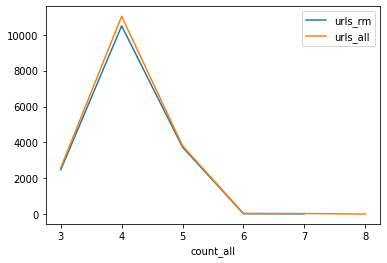

In [23]:
# No difference between the counts of "REMOVE" urls and all urls.
# The amount of REMOVE URL's is a problem, or more accurately the lack of Non-Remove Data is a problem.
ax = remove_counts.sort_values("count_rm").plot(x="count_rm", y = "urls_rm")
all_counts.sort_values("count_all").plot(ax=ax, x="count_all", y = "urls_all")

In [24]:
# Look at the percentatge of URLs that have a "REMOVE" value in the assess column.
data[data["assess"]== "REMOVE"].shape[0]/data.shape[0]

0.9567950622928335

<AxesSubplot:xlabel='count_no_rm'>

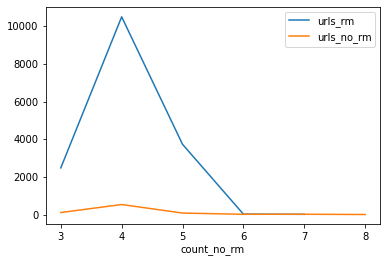

In [25]:
# No telling difference between the counts of "REMOVE" urls and non-"REMOVE" urls.
ax = remove_counts.sort_values("count_rm").plot(x="count_rm", y = "urls_rm")
no_rm_counts.sort_values("count_no_rm").plot(ax=ax, x="count_no_rm", y = "urls_no_rm")

In [26]:
no_rm_counts["urls_no_rm"].sum()

756

In [27]:
#Try "normalizing" (is that the word?) both sets of data.
no_rm_counts["no_rm_percentage"] = no_rm_counts["urls_no_rm"].apply(lambda x: x/(no_rm_counts["urls_no_rm"].sum()))
remove_counts["rm_percentage"] = remove_counts["urls_rm"].apply(lambda x: x/(remove_counts["urls_rm"].sum()))

In [28]:
remove_counts

,count_rm,urls_rm,rm_percentage
0,4,10500,0.627165
1,5,3730,0.222793
2,3,2478,0.148011
3,6,22,0.001314
4,7,12,0.000717


In [29]:
no_rm_counts

,count_no_rm,urls_no_rm,no_rm_percentage
0,4,533,0.705026
1,3,108,0.142857
2,5,80,0.105820
3,7,17,0.022487
4,6,15,0.019841
5,8,3,0.003968


<AxesSubplot:xlabel='count_no_rm'>

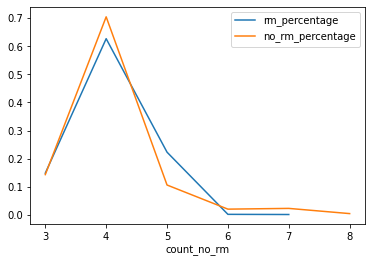

In [30]:
# No significant difference between the ratios of "REMOVE" urls and non-"REMOVE" urls either.
ax = remove_counts.sort_values("count_rm").plot(x="count_rm", y = "rm_percentage")
no_rm_counts.sort_values("count_no_rm").plot(ax=ax, x="count_no_rm", y = "no_rm_percentage")

## Create a dataframe of all subdomains
Try looking at the different subdomain names

In [31]:
sd1 = set(data["subdomain1"])

In [32]:
sd2 = set(data["subdomain2"])

In [33]:
sd3 = set(data["subdomain3"])

In [34]:
sd4 = set(data["subdomain4"])

In [35]:
sd5 = set(data["subdomain5"])


In [36]:
trunc = set(data["bottom_dom_trunc"])

In [37]:
# Create a set of all the unique subdomains and truncated bottom domains
all_domains_set = sd1.union(sd2).union(sd3).union(sd4).union(sd5).union(trunc)

In [38]:
len(all_domains_set)

21976

In [39]:
# turn it into a list
all_domains = list(all_domains_set)

In [40]:
# turn all values to strings
for i in range(0,len(all_domains)):
    all_domains[i] = str(all_domains[i])

In [41]:
# remove "nan" from the list
all_domains.remove("nan")

In [42]:
# remove "edu" from the list - it is in every URL.
all_domains.remove("edu")

In [43]:
# remove "harvard" from the list - it is in every URL.
all_domains.remove("harvard")

In [44]:
all_domains.sort()

In [45]:
# List all the domains
# all_domains

In [46]:
# Put the list of subdomains into a data frame
domains_df = pd.DataFrame(all_domains, columns=["domain"])

In [47]:
domains_df

,domain
0,0000w
1,0000ws2
2,0000ws5
3,0000ws6
4,00131
...,...
21968,zuckermanfellows
21969,zztes
21970,zztestbuildingsw1
21971,zzz36


In [48]:
# Can find how frequently a domain is accociated with REMOVE, KEEP, or CHECK
count_occ("REMOVE","0000w")

3

#### Add the counts of REMOVE, KEEP, and CHECK occurences to the domains_df dataframe.

In [49]:
domains_df["remove_count"] = domains_df["domain"].apply(lambda x: count_occ("REMOVE", x))


In [50]:
domains_df["keep_count"] = domains_df["domain"].apply(lambda x: count_occ("KEEP", x))

In [51]:
domains_df["check_count"] = domains_df["domain"].apply(lambda x: count_occ("CHECK", x))

In [52]:
domains_df["remove_percent"] = domains_df["remove_count"]/(domains_df["remove_count"] + domains_df["keep_count"] + domains_df["check_count"])

In [53]:
domains_df["keep_percent"] = domains_df["keep_count"]/(domains_df["remove_count"] + domains_df["keep_count"] + domains_df["check_count"])

In [54]:
domains_df.reset_index(drop=True)

,domain,remove_count,keep_count,check_count,remove_percent,keep_percent
0,0000w,3,0,0,1.0,0.0
1,0000ws2,1,0,0,1.0,0.0
2,0000ws5,1,0,0,1.0,0.0
3,0000ws6,1,0,0,1.0,0.0
4,00131,1,0,0,1.0,0.0
...,...,...,...,...,...,...
21968,zuckermanfellows,0,0,1,0.0,0.0
21969,zztes,1,0,0,1.0,0.0
21970,zztestbuildingsw1,1,0,0,1.0,0.0
21971,zzz36,2,0,0,1.0,0.0


In [63]:
search("mgw",data,["url"])

Skipped Column: url column does not contain string objects and cannot be searched. 'list' object has no attribute 'find'


,name,http status code,title,url,domain,predomain,subdomain1,subdomain2,subdomain3,subdomain4,...,public,login,harvard_key,resolved_url,success,assess,note,bottom_domain,domain_count,bottom_dom_trunc


In [64]:
# create a dataframe to look at domains which:
# -- are removed atleast 97% of the time,
# -- have been in URLs flagged for removal atleast 10 times,
# -- have not been identified in a URL to keep more than once.

exclude = domains_df[(domains_df["remove_percent"] >= .97) & (domains_df["remove_count"] > 10) & (domains_df["keep_count"] <= 1)]

In [65]:
# see how many domains turn up: 159
exclude.shape

(159, 6)

In [66]:
# look at all of the rows
show_rows("on", 160)
exclude

,domain,remove_count,keep_count,check_count,remove_percent,keep_percent
351,ad,29,0,0,1.000000,0.000000
778,atgw-,20,0,0,1.000000,0.000000
1290,bs-,12,0,0,1.000000,0.000000
1423,cadm,31,0,0,1.000000,0.000000
1619,ccb-,19,0,0,1.000000,0.000000
1899,chem,67,0,0,1.000000,0.000000
2082,client,368,0,0,1.000000,0.000000
2320,core-,92,0,0,1.000000,0.000000
2565,csc-,38,0,0,1.000000,0.000000
2721,cvrc-,12,0,0,1.000000,0.000000


In [67]:
# reset the display row option.
show_rows()

In [68]:
# See how many times these domains appear. 
exclude["remove_count"].sum()

14348

In [69]:
# Look at "zinc" as a string in domains
search("zinc", domains_df,["domain"])

,domain,remove_count,keep_count,check_count,remove_percent,keep_percent
0,zinc1,20,0,0,1.0,0.0
1,zinc108,1,0,0,1.0,0.0
2,zinc109,1,0,0,1.0,0.0
3,zinc113,1,0,0,1.0,0.0
4,zinc118,1,0,0,1.0,0.0
...,...,...,...,...,...,...
58,zinc85,1,0,0,1.0,0.0
59,zinc89,1,0,0,1.0,0.0
60,zinc9,2,0,0,1.0,0.0
61,zinc92,1,0,0,1.0,0.0


#### Look at some domain names, or partial domain names

In [70]:
search("zinc", data,["name"])

,name,http status code,title,url,domain,predomain,subdomain1,subdomain2,subdomain3,subdomain4,...,public,login,harvard_key,resolved_url,success,assess,note,bottom_domain,domain_count,bottom_dom_trunc
0,zinc108.cfa.harvard.edu,NaN,NaN,"[zinc108, cfa, harvard, edu]",harvard.edu,zinc108.cfa,cfa,zinc108,NaN,NaN,...,0,0,0,-1,-1,REMOVE,ERROR: http://zinc108.cfa.harvard.edu : HTTPCo...,zinc108,4,zinc1
1,zinc109.cfa.harvard.edu,NaN,NaN,"[zinc109, cfa, harvard, edu]",harvard.edu,zinc109.cfa,cfa,zinc109,NaN,NaN,...,0,0,0,-1,-1,REMOVE,ERROR: http://zinc109.cfa.harvard.edu : HTTPCo...,zinc109,4,zinc1
2,zinc113.cfa.harvard.edu,NaN,NaN,"[zinc113, cfa, harvard, edu]",harvard.edu,zinc113.cfa,cfa,zinc113,NaN,NaN,...,0,0,0,-1,-1,REMOVE,ERROR: http://zinc113.cfa.harvard.edu : HTTPCo...,zinc113,4,zinc1
3,zinc118.cfa.harvard.edu,NaN,NaN,"[zinc118, cfa, harvard, edu]",harvard.edu,zinc118.cfa,cfa,zinc118,NaN,NaN,...,0,0,0,-1,-1,REMOVE,ERROR: http://zinc118.cfa.harvard.edu : HTTPCo...,zinc118,4,zinc1
4,zinc128.cfa.harvard.edu,NaN,NaN,"[zinc128, cfa, harvard, edu]",harvard.edu,zinc128.cfa,cfa,zinc128,NaN,NaN,...,0,0,0,-1,-1,REMOVE,ERROR: http://zinc128.cfa.harvard.edu : HTTPCo...,zinc128,4,zinc1
5,zinc137.cfa.harvard.edu,NaN,NaN,"[zinc137, cfa, harvard, edu]",harvard.edu,zinc137.cfa,cfa,zinc137,NaN,NaN,...,0,0,0,-1,-1,REMOVE,ERROR: http://zinc137.cfa.harvard.edu : HTTPCo...,zinc137,4,zinc1
6,zinc145.cfa.harvard.edu,NaN,NaN,"[zinc145, cfa, harvard, edu]",harvard.edu,zinc145.cfa,cfa,zinc145,NaN,NaN,...,0,0,0,-1,-1,REMOVE,ERROR: http://zinc145.cfa.harvard.edu : HTTPCo...,zinc145,4,zinc1
7,zinc151.cfa.harvard.edu,NaN,NaN,"[zinc151, cfa, harvard, edu]",harvard.edu,zinc151.cfa,cfa,zinc151,NaN,NaN,...,0,0,0,-1,-1,REMOVE,ERROR: http://zinc151.cfa.harvard.edu : HTTPCo...,zinc151,4,zinc1
8,zinc156.cfa.harvard.edu,NaN,NaN,"[zinc156, cfa, harvard, edu]",harvard.edu,zinc156.cfa,cfa,zinc156,NaN,NaN,...,0,0,0,-1,-1,REMOVE,ERROR: http://zinc156.cfa.harvard.edu : HTTPCo...,zinc156,4,zinc1
9,zinc160.cfa.harvard.edu,NaN,NaN,"[zinc160, cfa, harvard, edu]",harvard.edu,zinc160.cfa,cfa,zinc160,NaN,NaN,...,0,0,0,-1,-1,REMOVE,ERROR: http://zinc160.cfa.harvard.edu : HTTPCo...,zinc160,4,zinc1


In [71]:
search("printer", domains_df,["domain"]).remove_count.sum()

33

In [72]:
search("printer", domains_df,["domain"]).keep_count.sum()

0

In [73]:
# How many URLS could be removed with domains on the exclude list
exclude["remove_count"].sum()/domains_df.shape[0]

0.6529832066627225

In [74]:
find_from_sd("hfc-guest-160")

,name,http status code,title,url,domain,predomain,subdomain1,subdomain2,subdomain3,subdomain4,...,public,login,harvard_key,resolved_url,success,assess,note,bottom_domain,domain_count,bottom_dom_trunc
0,hfc-guest-160.173.harvard.edu,NaN,NaN,"[hfc-guest-160, 173, harvard, edu]",harvard.edu,hfc-guest-160.173,173,hfc-guest-160,NaN,NaN,...,0,0,0,-1,-1,REMOVE,ERROR: http://hfc-guest-160.173.harvard.edu : ...,hfc-guest-160,4,hfc-
1,hfc-guest-160.175.harvard.edu,NaN,NaN,"[hfc-guest-160, 175, harvard, edu]",harvard.edu,hfc-guest-160.175,175,hfc-guest-160,NaN,NaN,...,0,0,0,-1,-1,REMOVE,ERROR: http://hfc-guest-160.175.harvard.edu : ...,hfc-guest-160,4,hfc-
2,hfc-guest-160.179.harvard.edu,NaN,NaN,"[hfc-guest-160, 179, harvard, edu]",harvard.edu,hfc-guest-160.179,179,hfc-guest-160,NaN,NaN,...,0,0,0,-1,-1,REMOVE,ERROR: http://hfc-guest-160.179.harvard.edu : ...,hfc-guest-160,4,hfc-
3,hfc-guest-160.182.harvard.edu,NaN,NaN,"[hfc-guest-160, 182, harvard, edu]",harvard.edu,hfc-guest-160.182,182,hfc-guest-160,NaN,NaN,...,0,0,0,-1,-1,REMOVE,ERROR: http://hfc-guest-160.182.harvard.edu : ...,hfc-guest-160,4,hfc-
4,hfc-guest-160.186.harvard.edu,NaN,NaN,"[hfc-guest-160, 186, harvard, edu]",harvard.edu,hfc-guest-160.186,186,hfc-guest-160,NaN,NaN,...,0,0,0,-1,-1,REMOVE,ERROR: http://hfc-guest-160.186.harvard.edu : ...,hfc-guest-160,4,hfc-


In [75]:
# save/export the exclusion list
exclude.to_csv("exclusion_list.csv")

### A HEAT MAP

Look at correlation between domain names and KEEP, REMOVE, CHECK values.

In [76]:
plot_data = domains_df[domains_df["remove_count"] > 3][["domain","remove_count","keep_count","check_count"]]

In [77]:
plot_data.shape

(449, 4)

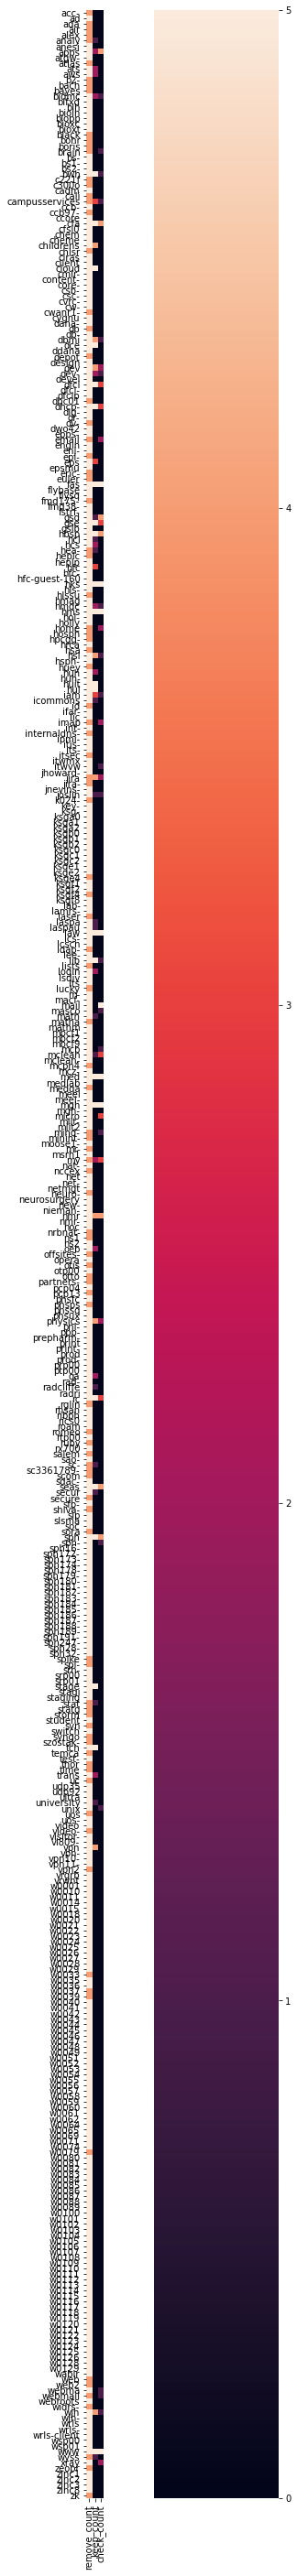

In [69]:
# Chart becomes tough to view at the size of the plot_data dataframe 
ax = plt.subplots(figsize=(20, 50))
ax = sns.heatmap(plot_data[["remove_count","keep_count","check_count"]],vmin=0, vmax=5, square=True, yticklabels=plot_data["domain"])

### MISC - Looking at domains

In [70]:
one_offs = domains_df[(domains_df["remove_count"] == 1) & (domains_df["remove_percent"] == 1.0)]

In [72]:
# there are a lot of domains that only appear once and have the REMOVE value.
one_offs

,domain,remove_count,keep_count,check_count,remove_percent,keep_percent
1,0000ws2,1,0,0,1.0,0.0
2,0000ws5,1,0,0,1.0,0.0
3,0000ws6,1,0,0,1.0,0.0
4,00131,1,0,0,1.0,0.0
5,0013108b8676,1,0,0,1.0,0.0
...,...,...,...,...,...,...
21963,zombie02,1,0,0,1.0,0.0
21965,zop-,1,0,0,1.0,0.0
21966,zop-v,1,0,0,1.0,0.0
21969,zztes,1,0,0,1.0,0.0


In [73]:
search("zinc",domains_df,["domain"])

,domain,remove_count,keep_count,check_count,remove_percent,keep_percent
0,zinc1,20,0,0,1.0,0.0
1,zinc108,1,0,0,1.0,0.0
2,zinc109,1,0,0,1.0,0.0
3,zinc113,1,0,0,1.0,0.0
4,zinc118,1,0,0,1.0,0.0
...,...,...,...,...,...,...
58,zinc85,1,0,0,1.0,0.0
59,zinc89,1,0,0,1.0,0.0
60,zinc9,2,0,0,1.0,0.0
61,zinc92,1,0,0,1.0,0.0


In [74]:
search("udp",domains_df,["domain"]).remove_count.sum()

88

In [273]:
find_from_sd("wjh")

,name,http status code,title,url,domain,predomain,subdomain1,subdomain2,subdomain3,subdomain4,...,login,harvard_key,resolved_url,success,assess,note,domain_list,bottom_domain,domain_count,bottom_dom_trunc
0,alvarezlab.wjh.harvard.edu,200.0,Welcome to nginx!,"['alvarezlab', 'wjh', 'harvard', 'edu']",harvard.edu,alvarezlab.wjh,wjh,alvarezlab,NaN,NaN,...,0,0,http://alvarezlab.wjh.harvard.edu/,1,KEEP,VALID: http://alvarezlab.wjh.harvard.edu: 200,"[alvarezlab, wjh, harvard, edu]",alvarezlab,4,alvar
1,andl.wjh.harvard.edu,200.0,Home | Affective Neuroscience & Development La...,"['andl', 'wjh', 'harvard', 'edu']",harvard.edu,andl.wjh,wjh,andl,NaN,NaN,...,0,0,https://andl.wjh.harvard.edu/,1,KEEP,HTTP Check: requested http://andl.wjh.harvard....,"[andl, wjh, harvard, edu]",andl,4,andl
2,www.corenlp.alvarezlab.wjh.harvard.edu,200.0,NaN,"['www', 'corenlp', 'alvarezlab', 'wjh', 'harva...",harvard.edu,www.corenlp.alvarezlab.wjh,wjh,alvarezlab,corenlp,www,...,0,0,https://www.corenlp.alvarezlab.wjh.harvard.edu/,1,KEEP,HTTP Check: requested http://www.corenlp.alvar...,"[www, corenlp, alvarezlab, wjh, harvard, edu]",www,6,www
3,1368-hp3015.wjh.harvard.edu,-1.0,NaN,"['1368-hp3015', 'wjh', 'harvard', 'edu']",harvard.edu,1368-hp3015.wjh,wjh,1368-hp3015,NaN,NaN,...,0,0,-1,-1,REMOVE,ERROR: http://1368-hp3015.wjh.harvard.edu : HT...,"[1368-hp3015, wjh, harvard, edu]",1368-hp3015,4,1368-
4,7thflprintsvr.wjh.harvard.edu,-1.0,NaN,"['7thflprintsvr', 'wjh', 'harvard', 'edu']",harvard.edu,7thflprintsvr.wjh,wjh,7thflprintsvr,NaN,NaN,...,0,0,-1,-1,REMOVE,ERROR: http://7thflprintsvr.wjh.harvard.edu : ...,"[7thflprintsvr, wjh, harvard, edu]",7thflprintsvr,4,7thfl
5,beserver.wjh.harvard.edu,-1.0,NaN,"['beserver', 'wjh', 'harvard', 'edu']",harvard.edu,beserver.wjh,wjh,beserver,NaN,NaN,...,0,0,-1,-1,REMOVE,ERROR: http://beserver.wjh.harvard.edu : HTTPC...,"[beserver, wjh, harvard, edu]",beserver,4,beser
6,dgilbert-5.wjh.harvard.edu,-1.0,NaN,"['dgilbert-5', 'wjh', 'harvard', 'edu']",harvard.edu,dgilbert-5.wjh,wjh,dgilbert-5,NaN,NaN,...,0,0,-1,-1,REMOVE,ERROR: http://dgilbert-5.wjh.harvard.edu : HTT...,"[dgilbert-5, wjh, harvard, edu]",dgilbert-5,4,dgilbert-
7,gallup.wjh.harvard.edu,NaN,NaN,"['gallup', 'wjh', 'harvard', 'edu']",harvard.edu,gallup.wjh,wjh,gallup,NaN,NaN,...,0,0,-1,-1,REMOVE,ERROR: http://gallup.wjh.harvard.edu : HTTPCon...,"[gallup, wjh, harvard, edu]",gallup,4,gallu
8,groupbrain.wjh.harvard.edu,NaN,NaN,"['groupbrain', 'wjh', 'harvard', 'edu']",harvard.edu,groupbrain.wjh,wjh,groupbrain,NaN,NaN,...,0,0,-1,-1,REMOVE,ERROR: http://groupbrain.wjh.harvard.edu : HTT...,"[groupbrain, wjh, harvard, edu]",groupbrain,4,group
9,hackman-6.wjh.harvard.edu,NaN,NaN,"['hackman-6', 'wjh', 'harvard', 'edu']",harvard.edu,hackman-6.wjh,wjh,hackman-6,NaN,NaN,...,0,0,-1,-1,REMOVE,ERROR: http://hackman-6.wjh.harvard.edu : HTTP...,"[hackman-6, wjh, harvard, edu]",hackman-6,4,hackman-


In [158]:
search("wjh",data,["subdomain1"])

,name,http status code,title,url,domain,predomain,subdomain1,subdomain2,subdomain3,subdomain4,subdomain5,subdomain6,res_status,status_message,redirect,redirect_code,public,login,harvard_key,resolved_url,success,assess,note,bottom_domain,domain_count,bottom_dom_trunc
0,alvarezlab.wjh.harvard.edu,200.0,Welcome to nginx!,"[alvarezlab, wjh, harvard, edu]",harvard.edu,alvarezlab.wjh,wjh,alvarezlab,NaN,NaN,NaN,NaN,200,VALID,0,0,1,0,0,http://alvarezlab.wjh.harvard.edu/,1,KEEP,VALID: http://alvarezlab.wjh.harvard.edu: 200,alvarezlab,4,alvar
1,andl.wjh.harvard.edu,200.0,Home | Affective Neuroscience & Development La...,"[andl, wjh, harvard, edu]",harvard.edu,andl.wjh,wjh,andl,NaN,NaN,NaN,NaN,200,HTTPS_REDIRECT,1,301,1,0,0,https://andl.wjh.harvard.edu/,1,KEEP,HTTP Check: requested http://andl.wjh.harvard....,andl,4,andl
2,www.corenlp.alvarezlab.wjh.harvard.edu,200.0,NaN,"[www, corenlp, alvarezlab, wjh, harvard, edu]",harvard.edu,www.corenlp.alvarezlab.wjh,wjh,alvarezlab,corenlp,www,NaN,NaN,200,HTTPS_REDIRECT,1,301,1,0,0,https://www.corenlp.alvarezlab.wjh.harvard.edu/,1,KEEP,HTTP Check: requested http://www.corenlp.alvar...,www,6,www
3,1368-hp3015.wjh.harvard.edu,-1.0,NaN,"[1368-hp3015, wjh, harvard, edu]",harvard.edu,1368-hp3015.wjh,wjh,1368-hp3015,NaN,NaN,NaN,NaN,-1,empty,0,0,0,0,0,-1,-1,REMOVE,ERROR: http://1368-hp3015.wjh.harvard.edu : HT...,1368-hp3015,4,1368-
4,7thflprintsvr.wjh.harvard.edu,-1.0,NaN,"[7thflprintsvr, wjh, harvard, edu]",harvard.edu,7thflprintsvr.wjh,wjh,7thflprintsvr,NaN,NaN,NaN,NaN,-1,empty,0,0,0,0,0,-1,-1,REMOVE,ERROR: http://7thflprintsvr.wjh.harvard.edu : ...,7thflprintsvr,4,7thfl
5,beserver.wjh.harvard.edu,-1.0,NaN,"[beserver, wjh, harvard, edu]",harvard.edu,beserver.wjh,wjh,beserver,NaN,NaN,NaN,NaN,-1,empty,0,0,0,0,0,-1,-1,REMOVE,ERROR: http://beserver.wjh.harvard.edu : HTTPC...,beserver,4,beser
6,dgilbert-5.wjh.harvard.edu,-1.0,NaN,"[dgilbert-5, wjh, harvard, edu]",harvard.edu,dgilbert-5.wjh,wjh,dgilbert-5,NaN,NaN,NaN,NaN,-1,empty,0,0,0,0,0,-1,-1,REMOVE,ERROR: http://dgilbert-5.wjh.harvard.edu : HTT...,dgilbert-5,4,dgilbert-
7,dswjh.harvard.edu,NaN,NaN,"[dswjh, harvard, edu]",harvard.edu,dswjh,dswjh,NaN,NaN,NaN,NaN,NaN,-1,empty,0,0,0,0,0,-1,-1,REMOVE,ERROR: http://dswjh.harvard.edu : HTTPConnecti...,dswjh,3,dswjh
8,gallup.wjh.harvard.edu,NaN,NaN,"[gallup, wjh, harvard, edu]",harvard.edu,gallup.wjh,wjh,gallup,NaN,NaN,NaN,NaN,-1,empty,0,0,0,0,0,-1,-1,REMOVE,ERROR: http://gallup.wjh.harvard.edu : HTTPCon...,gallup,4,gallu
9,groupbrain.wjh.harvard.edu,NaN,NaN,"[groupbrain, wjh, harvard, edu]",harvard.edu,groupbrain.wjh,wjh,groupbrain,NaN,NaN,NaN,NaN,-1,empty,0,0,0,0,0,-1,-1,REMOVE,ERROR: http://groupbrain.wjh.harvard.edu : HTT...,groupbrain,4,group
